In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3


In [2]:
import os
print(os.getcwd())

/home/jliu787/BMI_776_Project/Code/network_comparison


In [7]:
genie3 = pd.read_csv('../../Results/Undirected_Results/GENIE3_net_gene_symbols_undirected.tsv', sep='\t')
grnboost2 = pd.read_csv('../../Results/Undirected_Results/GRNBoost2_net_gene_symbols_undirected.tsv', sep='\t')
pidc = pd.read_csv('../../Results/Undirected_Results/PIDC_net_gene_symbols_undirected.tsv', sep='\t')


print(genie3.columns.tolist())


['TF', 'target', 'importance']


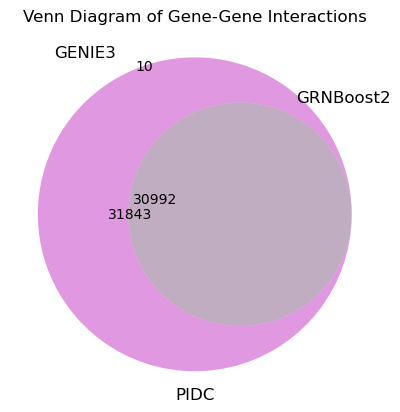

In [8]:
# --- Load your three adjacency matrices ---
# Assuming each is a square DataFrame with gene names as index/columns
genie3 = pd.read_csv('../../Results/Undirected_Results/GENIE3_net_gene_symbols_undirected.tsv', sep='\t')
grnboost2 = pd.read_csv('../../Results/Undirected_Results/GRNBoost2_net_gene_symbols_undirected.tsv', sep='\t')
pidc = pd.read_csv('../../Results/Undirected_Results/PIDC_net_gene_symbols_undirected.tsv', sep='\t')


# --- Convert each matrix to a set of undirected interactions ---
def edge_set(df):
    return set(frozenset((row['TF'], row['target'])) for _, row in df.iterrows())

edges_genie3 = edge_set(genie3)
edges_grnboost2 = edge_set(grnboost2)
edges_pidc = edge_set(pidc)

# --- Plot Venn Diagram ---
venn3(
    [edges_genie3, edges_grnboost2, edges_pidc],
    set_labels=('GENIE3', 'GRNBoost2', 'PIDC')
)

plt.title("Venn Diagram of Gene-Gene Interactions")
plt.show()

In [9]:
print("GENIE3:", len(edges_genie3))
print("GRNBoost2:", len(edges_grnboost2))
print("PIDC:", len(edges_pidc))


GENIE3: 62845
GRNBoost2: 31843
PIDC: 62835


In [13]:
# Get sizes of sets
only_genie3 = edges_genie3 - edges_grnboost2 - edges_pidc
only_grnboost2 = edges_grnboost2 - edges_genie3 - edges_pidc
only_pidc = edges_pidc - edges_genie3 - edges_grnboost2
shared_all = edges_genie3 & edges_grnboost2 & edges_pidc
genie3_pidc = edges_genie3 & edges_pidc - shared_all
genie3_grnboost2 = edges_genie3 & edges_grnboost2 - shared_all
grnboost2_pidc = edges_grnboost2 & edges_pidc - shared_all

# Print a simple table
summary = {
    "Only GENIE3": len(only_genie3),
    "Only GRNBoost2": len(only_grnboost2),
    "Only PIDC": len(only_pidc),
    "GENIE3 ∩ PIDC": len(genie3_pidc),
    "GENIE3 ∩ GRNBoost2": len(genie3_grnboost2),
    "GRNBoost2 ∩ PIDC": len(grnboost2_pidc),
    "All 3": len(shared_all)
}

for k, v in summary.items():
    print(f"{k:<20}: {v}")


Only GENIE3         : 10
Only GRNBoost2      : 0
Only PIDC           : 0
GENIE3 ∩ PIDC       : 30992
GENIE3 ∩ GRNBoost2  : 0
GRNBoost2 ∩ PIDC    : 0
All 3               : 31843


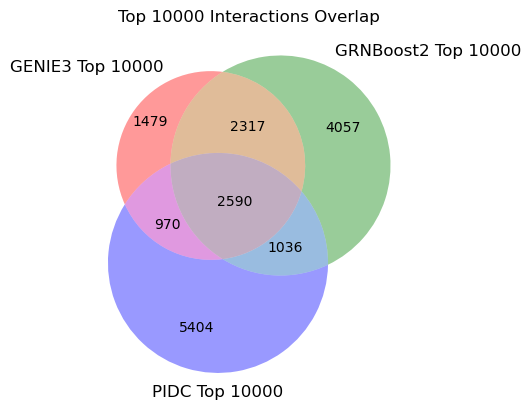

In [14]:
def top_k_edges(df, k=10000):
    df_top = df.nlargest(k, 'importance')
    return set(frozenset((row['TF'], row['target'])) for _, row in df_top.iterrows())

k = 10000  # or 5000, 20000, etc.
edges_top_genie3 = top_k_edges(genie3, k)
edges_top_grnboost2 = top_k_edges(grnboost2, k)
edges_top_pidc = top_k_edges(pidc, k)

# Plot Venn
venn3(
    [edges_top_genie3, edges_top_grnboost2, edges_top_pidc],
    set_labels=(f'GENIE3 Top {k}', f'GRNBoost2 Top {k}', f'PIDC Top {k}')
)
plt.title(f"Top {k} Interactions Overlap")
plt.show()


In [21]:
# --- Function to get top-k undirected edges ---
def top_k_edges(df, k=10000):
    df_top = df.nlargest(k, 'importance')  # top k by importance
    return set(frozenset((row['TF'], row['target'])) for _, row in df_top.iterrows())

# --- Get top 10,000 edges from each method ---
k = 10000
edges_genie3_top = top_k_edges(genie3, k)
edges_grnboost2_top = top_k_edges(grnboost2, k)
edges_pidc_top = top_k_edges(pidc, k)

# --- Compute overlaps ---
only_genie3 = edges_genie3_top - edges_grnboost2_top - edges_pidc_top
only_grnboost2 = edges_grnboost2_top - edges_genie3_top - edges_pidc_top
only_pidc = edges_pidc_top - edges_genie3_top - edges_grnboost2_top
shared_all = edges_genie3_top & edges_grnboost2_top & edges_pidc_top
genie3_pidc = (edges_genie3_top & edges_pidc_top) - shared_all
genie3_grnboost2 = (edges_genie3_top & edges_grnboost2_top) - shared_all
grnboost2_pidc = (edges_grnboost2_top & edges_pidc_top) - shared_all

# --- Print result summary ---
summary = {
    "Only GENIE3": len(only_genie3),
    "Only GRNBoost2": len(only_grnboost2),
    "Only PIDC": len(only_pidc),
    "GENIE3 ∩ PIDC": len(genie3_pidc),
    "GENIE3 ∩ GRNBoost2": len(genie3_grnboost2),
    "GRNBoost2 ∩ PIDC": len(grnboost2_pidc),
    "All 3": len(shared_all)
}

print(f"\n=== Top {k} Edge Overlap Summary ===")
for k, v in summary.items():
    print(f"{k:<22}: {v}")



=== Top 10000 Edge Overlap Summary ===
Only GENIE3           : 1479
Only GRNBoost2        : 4057
Only PIDC             : 5404
GENIE3 ∩ PIDC         : 970
GENIE3 ∩ GRNBoost2    : 2317
GRNBoost2 ∩ PIDC      : 1036
All 3                 : 2590


In [22]:
def extract_genes(edge_set):
    genes = set()
    for edge in edge_set:
        genes.update(edge)
    return genes

genes_only_genie3 = extract_genes(only_genie3)
genes_only_grnboost2 = extract_genes(only_grnboost2)
genes_only_pidc = extract_genes(only_pidc)

print("Unique genes in GENIE3:", len(genes_only_genie3))
print("Unique genes in grnboost2:", len(genes_only_grnboost2))
print("Unique genes in pidc:", len(genes_only_pidc))


Unique genes in GENIE3: 335
Unique genes in grnboost2: 355
Unique genes in pidc: 355


In [25]:
import networkx as nx

def build_graph(edges):
    G = nx.Graph()
    # Only add edges that are actually between two different genes
    clean_edges = [tuple(e) for e in edges if len(e) == 2]
    G.add_edges_from(clean_edges)
    return G


for name, edges in [('GENIE3', edges_genie3_top), ('GRNBoost2', edges_grnboost2_top), ('PIDC', edges_pidc_top)]:
    G = build_graph(edges)
    print(f"\n{name} Network:")
    print("Nodes:", G.number_of_nodes())
    print("Edges:", G.number_of_edges())
    print("Average Degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())



GENIE3 Network:
Nodes: 355
Edges: 7351
Average Degree: 41.414084507042254

GRNBoost2 Network:
Nodes: 355
Edges: 10000
Average Degree: 56.33802816901409

PIDC Network:
Nodes: 355
Edges: 10000
Average Degree: 56.33802816901409
